# Project Part 1: Data Cleaning

* Student name: Daniel Büttner


## Initial Investigation, Exploratory Data Analysis and Data Cleaning

- 1) Loading relevant modules and raw data from file
- 2) First view on data/column formats and missing values (# non-null values)
- 3) Inspect repeated House IDs
- 4) Investigate value range and distribution of dependent variable, object of study: house price
- 5) Exploring columns, variables with missing values, cleaning, imputing
- 6) Exploring value ranges and characteristics of other variables
- 7) Store cleaned data frame in file for further regression analysis

## 1) Loading relevant modules and raw data from file:

In [535]:
# Importing relevant Python modules and raw data from file:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sms
import statsmodels.formula.api as smf

file1 = '/Users/dbuettner/nf-ds/Project_Data_Analysis/House_Prices_Project/King_County_House_prices_dataset.csv'
h_p = pd.read_csv(file1, skipinitialspace=True)

## 2) First view on data/column formats and missing values:

In [417]:
# Looking at the general Information about the different Columns:
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Variables "waterfront", "view" and "yr_renovated" contain missing values. Variables "date" and "sqft_basement" are stored as object type variables.

In [418]:
# first look at summary statistics:
h_p.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [419]:
# looking at the number of unique values for the different variables:
h_p.nunique().sort_values(ascending=False)

id               21420
sqft_lot          9776
sqft_lot15        8682
lat               5033
price             3622
sqft_living       1034
sqft_above         942
sqft_living15      777
long               751
date               372
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           29
bedrooms            12
grade               11
floors               6
condition            5
view                 5
waterfront           2
dtype: int64

## 3) Inspect repeated House IDs:

- Why is the number of unique values of the ID columns not equal to the total number of rows in the data set??

In [420]:
# Value counts for the ID column

h_p.id.value_counts().nlargest(20)

#(h_p.id.value_counts() > 1).sum()
# !!! total number of houses sold more than one: 176 (175 twice, 1 three-times) !!!

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
5282200015    2
2787460720    2
5536100020    2
2568300045    2
8648900110    2
8910500150    2
2044500213    2
4222310010    2
8651402750    2
8820903380    2
Name: id, dtype: int64

#### looking at repeated House ID examples:

In [421]:
h_p[h_p.id == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


In [422]:
h_p[h_p.id == 1825069031]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3946,1825069031,8/14/2014,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
3947,1825069031,10/16/2014,550000.0,4,1.75,2410,8447,2.0,NaN,3.0,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789


In [423]:
#h_p[h_p.id == 2019200220]

In [424]:
h_p[h_p.id == 7129304540]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15796,7129304540,12/20/2014,133000.0,5,2.0,1430,5600,1.5,0.0,0.0,...,6,1430,0.0,1947,NaN,98118,47.5192,-122.266,1860,5980
15797,7129304540,5/14/2015,440000.0,5,2.0,1430,5600,1.5,0.0,0.0,...,6,1430,0.0,1947,0.0,98118,47.5192,-122.266,1860,5980


In [425]:
#h_p[h_p.id == 1781500435]

In [426]:
#h_p[h_p.id == 3969300030]

In [427]:
#h_p[h_p.id == 2560801222]

In [428]:
#h_p[h_p.id == 3883800011]

In [429]:
#h_p[h_p.id == 2228900270]

In [430]:
#h_p[h_p.id == 251300110]

In [366]:
# Looking for indicies to the nlargest value counts for the id column (when looked at value counts, ids with more
# than one count are present --> multiple sales within the time frame of the data set)

#ind_id_largest = h_p.id.value_counts().nlargest(30).index
#ind_id_largest

In [367]:
#h_p[h_p['id'] in ind_id_largest]
#h_p[[h_p.id == ind_id_largest[i] for i in range(len(ind_id_largest))]]



# Showing id and price for the first (30) houses with multiple sales in the data set --> vast increase in sales 
# price at times

#for i in range(len(ind_id_largest)):
#    print(h_p.loc[h_p.id == ind_id_largest[i], ['id', 'price']])

In [368]:
#h_p[h_p.waterfront == 1].id.value_counts().nlargest(20)

In [369]:
#print(h_p[h_p.yr_renovated.isnull()].id.value_counts().nlargest(20))
#h_p[h_p.yr_renovated != 0].id.value_counts().nlargest(20)

#### Inference: 176 House IDs have value counts > 1 in the data set (175/2, 1/3). After inspection, it becomes clear that some houses have been sold more than once within the time scope of the data set (which only covers about a year). Where some houses were subsequently sold for the same price, most houses showed a significant increase in sales price.

#### --> This indicates that houses in King County are objects of financial speculation.

#### --> Advice: avoid buying a house which has recently been sold before

#### From a first inspection, many repeatedly sold houses showed NaN values for indicies "yr_renovated" and "waterfront" where an available value was 0. This will later serve as basis for imputing these indicies.

In [433]:
# Find indices where id.value_count > 1

ind_multi_ids = (h_p.id.value_counts() > 1)

ind_multi_ids2 = []

for i in range(len(ind_multi_ids)):
    if ind_multi_ids.iloc[i] == True:
        ind_multi_ids2.append(ind_multi_ids.index[i])

index_list = [ind for i in range(len(ind_multi_ids2)) for ind in h_p[h_p.id == ind_multi_ids2[i]].index]
#min(index_list)
#index_lists[:3]

In [475]:
# Remove first item from index list, this is the first of three sales of that house, all other were sold twice
index_list[:4]
#index_list.pop(0)

[17589, 17590, 3946, 3947]

Mean Price First Sale:       352263.11
Mean Price Second Sale:      488779.59
Mean Increase in Sale Price: 38.75 %


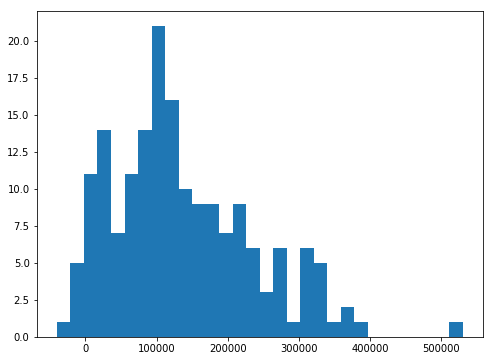

In [484]:
# Build a list of indicies and select prices for first and second sale of the house:

#print(index_list[0:6])
#print(index_list[:6:2])
#print(index_list[1:6:2])
#print(len(index_list[::2]))
#print(len(index_list[1::2]))

index_firstsale = index_list[::2]
index_secondsale = index_list[1::2]

h_p_firstsale = h_p.price.iloc[index_firstsale]
h_p_secondsale = h_p.price.iloc[index_secondsale]

diff_price = h_p_secondsale.values - h_p_firstsale.values


print('Mean Price First Sale:       ' + str(round(h_p_firstsale.mean(), 2)))
print('Mean Price Second Sale:      ' + str(round(h_p_secondsale.mean(), 2)))
print('Mean Increase in Sale Price: ' + str(round(diff_price.mean() * 100 / h_p_firstsale.mean(), 2)) + ' %')
#print(diff_price.mean())

plt.figure(figsize=(8,6))
plt.hist(diff_price, bins=30)
#plt.xlabel = ("Difference in Sale Prices")
plt.show()

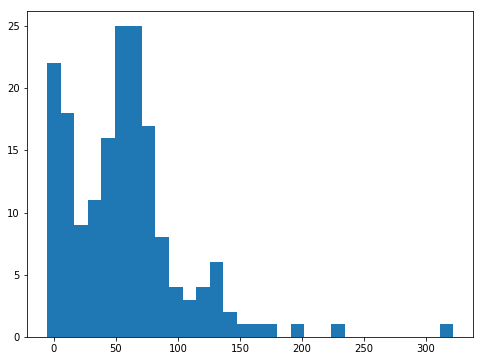

In [488]:
plt.figure(figsize=(8,6))
plt.hist((diff_price * 100 / h_p_firstsale), bins=30)
#plt.xlabel = ("Difference in Sale Prices")
plt.show()

### On average, there has been a steep increase in Sales Prices (39%) for repeatedly sold houses within this data set covering only about a year. Only the most recent house price is kept for further analysis.

In [489]:
# Drop indicies for the first sale of a house from the data frame, only keep most recent house price:

h_p2 = h_p.copy()
print(len(h_p2.id))

h_p2.drop(h_p2.index[index_list[0]], inplace=True)     # first price of the house which has been sold three times
h_p2.drop(h_p2.index[index_firstsale], inplace=True)
len(h_p2.id)  # len is reduced by 177 = 175 + 2 (175 houses sold twice, 1 house sold 3 times)

21597


21420

## 4) Look at the House Price Distribution

In [490]:
# Value Counts for House Price:
h_p2.price.value_counts().nlargest(15)

450000.0    172
350000.0    167
550000.0    157
500000.0    151
425000.0    150
325000.0    146
400000.0    144
375000.0    137
300000.0    131
525000.0    128
250000.0    127
475000.0    120
330000.0    119
650000.0    117
275000.0    112
Name: price, dtype: int64

In [491]:
# House Price summary statistics (in 1000$), nothing totally irregular/unexpected here:
h_p2.price.describe().div(1000)

count      21.420000
mean      541.759779
std       367.555997
min        78.000000
25%       324.937500
50%       450.000000
75%       645.000000
max      7700.000000
Name: price, dtype: float64

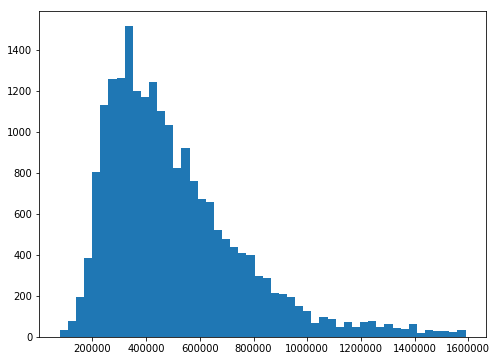

In [492]:
# House Price Distribution (excluding the upper end):
plt.figure(figsize=(8,6))
_ = plt.hist(x=h_p2[h_p2.price < h_p2.price.quantile(0.98)].price, bins=50)

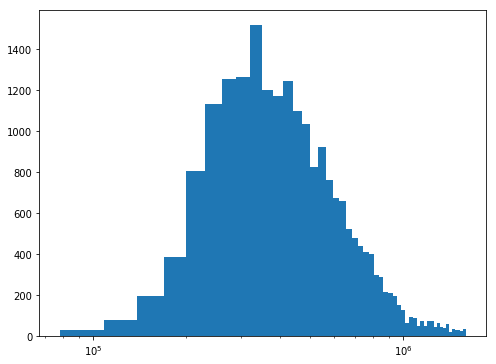

In [493]:
plt.figure(figsize=(8,6))
_ = plt.hist(x=h_p2[h_p2.price < h_p2.price.quantile(0.98)].price, bins=50)
plt.xscale('log')

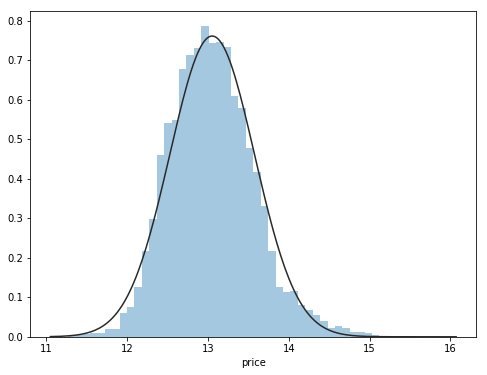

In [539]:
plt.figure(figsize=(8,6))
sns.distplot(np.log(h_p2['price']), fit=norm,  bins=50, kde=False)

#### The distribution of the House Prices for King County shows a strong positive skewness (right-skewed) as there are very few very expansive houses being sold.
#### When scaling the x-axis according to the logarithm of the price, it shows that house prices have a distribution similar to a log-normal distribution.

## 5) Exploring variables with missing values:

### Waterfront index (1 = with waterfront, 0 = without waterfront)

In [494]:
# Value counts of waterfront index
h_p2.waterfront.value_counts(dropna=False)

 0.0    18924
NaN      2350
 1.0      146
Name: waterfront, dtype: int64

#### I was trying to infer the waterfront value for the missing value data points by calculating the distance to the nearest neighbor. First signs showed very few data points being categorized as 1. This point stays open for future work. For now, set all missing values to 0:

In [495]:
# Impute missing values as 0, no waterfront view, and change data type of waterfront variable to int64:

h_p2.waterfront = h_p2.waterfront.fillna(0.0)
h_p2.waterfront = h_p2.waterfront.astype('int64')

### View index (how often a house has been viewed)

In [496]:
# Value counts of view index:
h_p2.view.value_counts(dropna=False)

 0.0    19253
 2.0      956
 3.0      505
 1.0      329
 4.0      314
NaN        63
Name: view, dtype: int64

#### Only 63 values are missing, simply impute by 0s

In [497]:
# Impute missing values as 0, not viewed, change data type of view variable to int64:

h_p2.view = h_p2.view.fillna(0.0)
h_p2.view = h_p2.view.astype('int64')

### Yr_renovated index (the year a house was renovated)

In [498]:
# Unique values and value counts for the years the houses have been renovated:

print(sorted(h_p2.yr_renovated.unique()))
h_p2.yr_renovated.value_counts(dropna=False).nlargest(20)

[0.0, 1945.0, 1954.0, 1970.0, 1971.0, 1980.0, 1991.0, nan, 1934.0, 1940.0, 1944.0, 1946.0, 1948.0, 1950.0, 1951.0, 1953.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1962.0, 1963.0, 1964.0, 1965.0, 1967.0, 1968.0, 1969.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


 0.0       16870
NaN         3810
 2014.0       73
 2003.0       31
 2013.0       31
 2007.0       30
 2000.0       29
 2005.0       29
 2004.0       22
 2009.0       21
 1990.0       21
 1989.0       20
 2006.0       20
 2002.0       17
 1991.0       16
 1998.0       16
 1999.0       15
 2008.0       15
 2010.0       15
 2001.0       15
Name: yr_renovated, dtype: int64

#### A lot of missing values, and a lot of values set to 0. This metric most likely is not qualified for further use in the analysis, as there are too little data points with clear information about renovation.

#### I built an index for whenever a house was renovated, but it showed to be rather irrelevant for the following analysis, so I exclude it here.

#### Important Note: the information about the current condition of a house already lies within the 'grade' and 'condition' variables anyhow!!

In [499]:
# Impute yr_renovated = 0 with missing values:

ind_zero_renov = h_p2[h_p2.yr_renovated == 0.0].index
#len(ind_zero_renov)

h_p2.loc[ind_zero_renov, 'yr_renovated'] = np.nan
h_p2.yr_renovated.value_counts(dropna=False).nlargest(20)

NaN        20680
 2014.0       73
 2003.0       31
 2013.0       31
 2007.0       30
 2000.0       29
 2005.0       29
 2004.0       22
 2009.0       21
 1990.0       21
 1989.0       20
 2006.0       20
 2002.0       17
 1991.0       16
 1998.0       16
 1999.0       15
 2008.0       15
 2010.0       15
 2001.0       15
 1983.0       15
Name: yr_renovated, dtype: int64

## 6) Exploring value ranges and characteristics of the other variables:

### Bedrooms

In [500]:
# Value Counts of the Number of Bedrooms:

#h_p.bedrooms.hist(bins=house_prices.bedrooms.max()-house_prices.bedrooms.min())
h_p.bedrooms.value_counts(dropna=False)

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [501]:
# Value 33 for Number of bedrooms suspicious, as it is vastly above all other values and has an average
# living area, therefore exclude:

h_p[h_p.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [502]:
# Exclude house with 33 bedrooms:

h_p2.drop(h_p2[h_p2.bedrooms == 33].index, inplace=True)

h_p2.bedrooms.max()

11

### Bathrooms

In [503]:
# Value Counts of the Number of Bathrooms:

h_p2.bathrooms.value_counts(dropna=False).nlargest(10)

2.50    5352
1.00    3794
1.75    3019
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
Name: bathrooms, dtype: int64

In [506]:
# As said in the data set description, the number of bathrooms is stored as (#bathrooms/bedroom), so it has to
# be multiplied be the bedrooms column:

#h_p2['bathrooms'] = h_p2.bathrooms * h_p2.bedrooms   # is that really realistic?! anyhow, take it as it is said so
h_p2.bathrooms.value_counts(dropna=False).nlargest(10)

10.00    2599
7.50     2394
3.00     2044
5.25     1853
2.00     1546
6.00     1311
6.75     1072
4.50      935
9.00      908
7.00      715
Name: bathrooms, dtype: int64

### Sqft_Living, Sqft_Above and Sqft_Basement columns

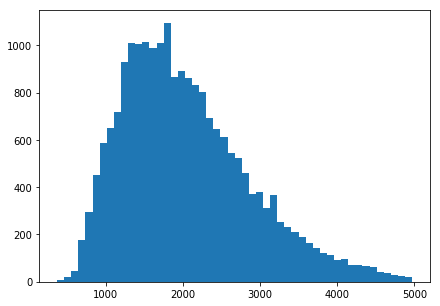

In [507]:
# Histogram Living Area in sqft:
plt.figure(figsize=(7,5))
_ = plt.hist(x=h_p2[h_p2.sqft_living < h_p2.sqft_living.quantile(0.99)].sqft_living, bins=50)

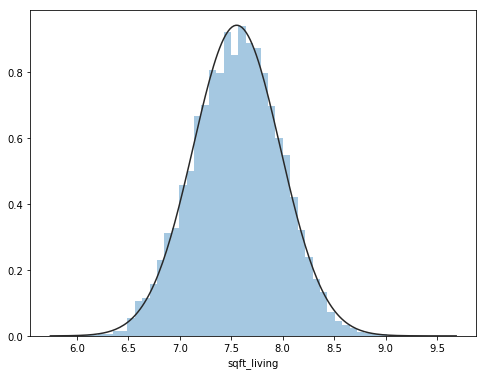

In [540]:
plt.figure(figsize=(8,6))
sns.distplot(np.log(h_p2['sqft_living']), fit=norm,  bins=50, kde=False)

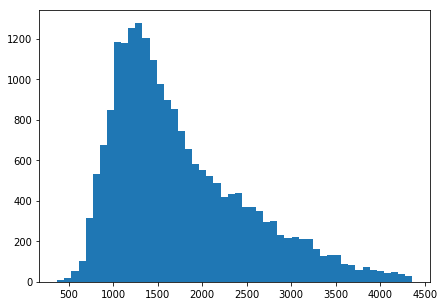

In [508]:
# Histogram Above Area in sqft:
plt.figure(figsize=(7,5))
_ = plt.hist(x=h_p2[h_p2.sqft_above < h_p2.sqft_above.quantile(0.99)].sqft_above, bins=50)

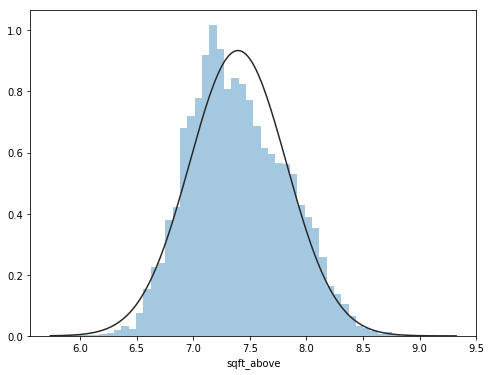

In [541]:
plt.figure(figsize=(8,6))
sns.distplot(np.log(h_p2['sqft_above']), fit=norm,  bins=50, kde=False)

In [509]:
# How often does Living Area equal Above Area:
print(len(h_p2.sqft_living))
print((h_p2.sqft_living == h_p2.sqft_above).sum())
print((h_p2.sqft_living != h_p2.sqft_above).sum())


#h_p2[h_p2.sqft_living == h_p2.sqft_above].sqft_living.count()
#h_p2[h_p2.sqft_living != h_p2.sqft_above].sqft_living.count()
#(h_p2.sqft_living != h_p2.sqft_above).sum()
#((h_p2.sqft_living - h_p2.sqft_above) == h_p2.sqft_basement).sum()

21419
12999
8420


### Dealing with the sqft_basement column

In [510]:
# Problem with Area Column 'sqft_basement', type object and a lot of ? in the data:

h_p2.sqft_basement.dtype
h_p2.sqft_basement.value_counts(dropna=False).nlargest(10)

0.0       12717
?           451
600.0       216
500.0       206
700.0       206
800.0       201
400.0       184
1000.0      146
900.0       141
300.0       141
Name: sqft_basement, dtype: int64

In [511]:
# Change data type of Basement column to numeric and fill Errors (?) with NaNs, and NaNs with 0s
# and change dtype to int64 (same as for sqft_living and sqft_above):

h_p2['sqft_basement'] = pd.to_numeric(h_p2.sqft_basement, errors='coerce').fillna(0.0)
h_p2.sqft_basement = h_p2.sqft_basement.astype('int64')

h_p2.sqft_basement.value_counts().nlargest(10)

0       13168
600       216
700       206
500       206
800       201
400       184
1000      146
900       141
300       141
480       103
Name: sqft_basement, dtype: int64

In [512]:
# From the data set description: sqft_living = sqft_above + sqft_basement
# For cases with sqft_basement Information present (not 0), check if sqft_living - sqft_above equals sqft_basement: true!!

ind_base = h_p2[h_p2.sqft_basement != 0].index
len(ind_base)
base_is_true = (h_p2.sqft_living[ind_base] - h_p2.sqft_above[ind_base]) == h_p2.sqft_basement[ind_base]
base_is_true.value_counts()
base_is_true.value_counts() == len(ind_base)

True    True
dtype: bool

In [513]:
# For cases with sqft_basement = 0, how many values of sqft_living - sqft_above are not 0 (169):

ind_nobase = h_p2[h_p2.sqft_basement == 0].index
liv_abv_equal = h_p2.sqft_living[ind_nobase] == h_p2.sqft_above[ind_nobase]

liv_abv_equal.value_counts(dropna=False)

True     12999
False      169
dtype: int64

In [514]:
# Fill all 169 values of sqft_basement = 0 with the correct values (sqft_living - sqft_above):
# quality check below, if all values of sqft_basement are >= 0:

filter_1 = (h_p2.sqft_basement == 0) & (h_p2.sqft_living != h_p2.sqft_above)
ind_liv_abv_nonequal = h_p2[filter_1].index
print(len(ind_liv_abv_nonequal))

h_p2.loc[ind_liv_abv_nonequal, 'sqft_basement'] = h_p2.sqft_living[ind_liv_abv_nonequal] - h_p2.sqft_above[ind_liv_abv_nonequal]
h_p2.sqft_basement.value_counts().nlargest(10)
#(h_p2.sqft_basement >= 0).value_counts()

169


0       12999
600       220
700       215
500       211
800       206
400       184
1000      147
900       143
300       141
480       106
Name: sqft_basement, dtype: int64

#### all 169 values of not present sqft_basement data were imputed by correct values (sqft_living - sqft_above)

### Inspection for remaining variables
#### as already seen from the initial inspection, these variable do not contain missing values

In [515]:
# Value counts for Area of the lot in sqft, sqft_lot:
h_p2.sqft_lot.value_counts(dropna=False).nlargest(5)

5000    355
6000    285
4000    249
7200    218
7500    118
Name: sqft_lot, dtype: int64

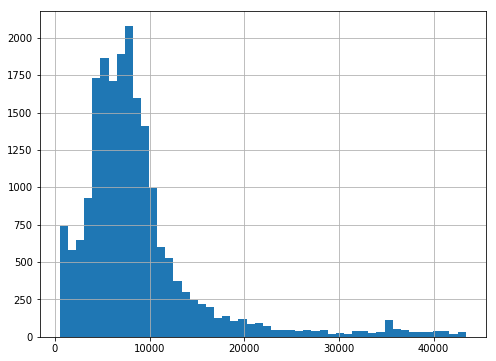

In [516]:
plt.figure(figsize=(8,6))
h_p2[h_p2.sqft_lot < h_p2.sqft_lot.quantile(0.95)].sqft_lot.hist(bins=50)

In [517]:
# Value counts of number of Floors:

h_p2.floors.value_counts(dropna=False)

1.0    10551
2.0     8203
1.5     1888
3.0      609
2.5      161
3.5        7
Name: floors, dtype: int64

In [518]:
# Value counts of condition index:

h_p2.condition.value_counts()

3    13900
4     5643
5     1686
2      162
1       28
Name: condition, dtype: int64

In [519]:
# Mean Price per Condition category (in 1000$):

h_p2.groupby('condition').mean().div(1000)['price']

condition
1    349.480357
2    333.746228
3    543.812526
4    522.262767
5    613.214256
Name: price, dtype: float64

In [520]:
# Value counts for Grade index:

h_p2.grade.value_counts()

7     8888
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [521]:
# Mean Price per Grade category (in 1000$):

h_p2.groupby('grade').mean().div(1000)['price']

grade
3      262.000000
4      212.001852
5      250.274791
6      304.047780
7      403.466690
8      543.361439
9      773.619041
10    1072.103565
11    1499.209997
12    2213.806818
13    3710.769231
Name: price, dtype: float64

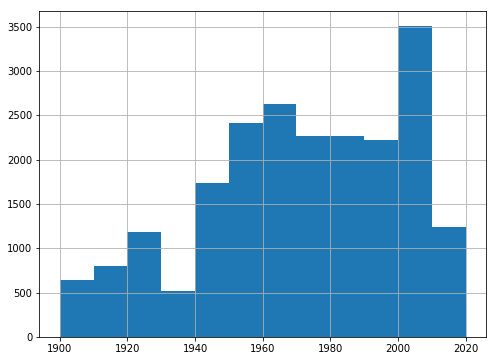

In [522]:
# Histogram of the years the houses were built:
plt.figure(figsize=(8,6))
h_p2.yr_built.hist(bins=range(1900,2021,10))

In [523]:
# Value counts of the years the house were built (20 largest):

#print(sorted(h_p.yr_built.unique()))
h_p2.yr_built.value_counts(dropna=False).nlargest(10)

2014    559
2006    453
2005    450
2004    429
2003    420
2007    415
1977    415
1978    384
1968    379
2008    367
Name: yr_built, dtype: int64

In [524]:
h_p2.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [525]:
h_p2.lat.unique()

array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])

In [526]:
h_p.long.isnull().sum()

0

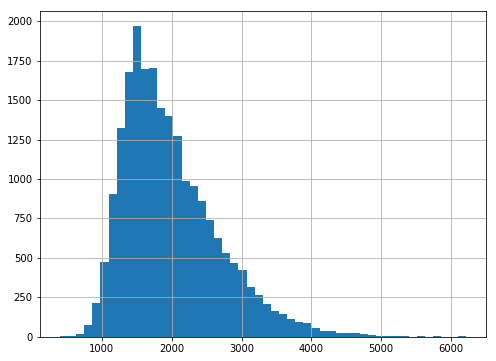

In [527]:
plt.figure(figsize=(8,6))
h_p2.sqft_living15.hist(bins=50)

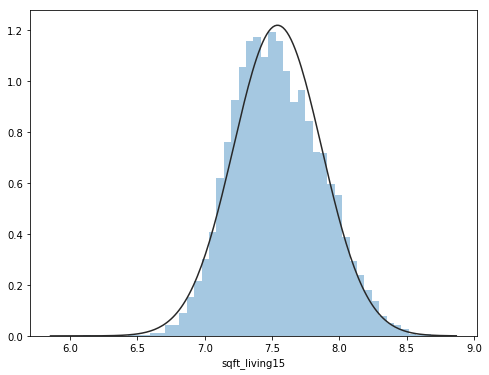

In [542]:
plt.figure(figsize=(8,6))
sns.distplot(np.log(h_p2['sqft_living15']), fit=norm,  bins=50, kde=False)

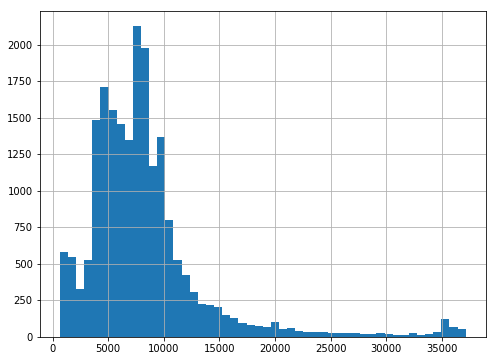

In [528]:
plt.figure(figsize=(8,6))
h_p2[h_p2.sqft_lot15 < h_p2.sqft_lot15.quantile(0.95)].sqft_lot15.hist(bins=50)

## 7) Store cleaned data set in file for further analysis

In [529]:
# inspect cleaned data frame:
h_p2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Data columns (total 21 columns):
id               21419 non-null int64
date             21419 non-null object
price            21419 non-null float64
bedrooms         21419 non-null int64
bathrooms        21419 non-null float64
sqft_living      21419 non-null int64
sqft_lot         21419 non-null int64
floors           21419 non-null float64
waterfront       21419 non-null int64
view             21419 non-null int64
condition        21419 non-null int64
grade            21419 non-null int64
sqft_above       21419 non-null int64
sqft_basement    21419 non-null int64
yr_built         21419 non-null int64
yr_renovated     740 non-null float64
zipcode          21419 non-null int64
lat              21419 non-null float64
long             21419 non-null float64
sqft_living15    21419 non-null int64
sqft_lot15       21419 non-null int64
dtypes: float64(6), int64(14), object(1)
memory usage: 4.2+ MB


In [530]:
h_p2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            21587, 21588, 21589, 21590, 21591, 21592, 21593, 21594, 21595,
            21596],
           dtype='int64', length=21419)

In [413]:
# write to csv file, without the old index (header=True is default)

In [531]:
h_p2.to_csv('/Users/dbuettner/nf-ds/Project_Data_Analysis/House_Prices_Project/king_county_house_prices_dataset_cleaned.csv', index=False)

### Trying to infer the waterfront index from closest distance to neighbors, future work:

In [329]:
# store old waterfront index:

wf_old = h_p.waterfront.copy()
wf_old.value_counts(dropna=False)

 0.0    19074
NaN      2376
 1.0      146
Name: waterfront, dtype: int64

In [315]:
h_p.waterfront.value_counts(dropna=False)

 0.0    19074
NaN      2376
 1.0      146
Name: waterfront, dtype: int64

In [316]:
h_p.lat.isnull().sum()

0

In [317]:
h_p.long.isnull().sum()

0

In [318]:
h_p.waterfront.isnull().index
h_p[h_p.waterfront.isnull()].index
w_f_nan_ind = h_p[h_p.waterfront.isnull()].index
w_f_nan_ind[1110]

9672

In [319]:
h_p.lat[w_f_nan_ind[1]]

47.6007

In [320]:
h_p_lat2 = h_p.lat.drop(w_f_nan_ind[111])
len(h_p_lat2)
h_p_lat3 = h_p.lat[h_p.index != w_f_nan_ind[111]]

In [321]:
h_p.lat[abs(h_p_lat3 - h_p.lat[w_f_nan_ind[1000]]).min()]

abs(h_p_lat3 - h_p.lat[w_f_nan_ind[1500]]).value_counts()
(abs(h_p_lat3 - h_p.lat[w_f_nan_ind[1000]]) == 0).sum()
h_p_lat3[abs(h_p_lat3 - h_p.lat[w_f_nan_ind[1000]]) == 0].index[0]
ind_w_f_nan_test = h_p_lat3[abs(h_p_lat3 - h_p.lat[w_f_nan_ind[1000]]) == 0].index[0]

#ind_w_f_nan_test2 = h_p_lat3[(abs(h_p_lat3 - h_p.lat[w_f_nan_ind[1000]]) == 0).all() and (h_p.waterfront.notna())].index
#ind_w_f_nan_test2
h_p.loc[ind_w_f_nan_test, :]

id               6329000705
date               4/2/2015
price                545000
bedrooms                  2
bathrooms               1.5
sqft_living            2340
sqft_lot              13380
floors                    1
waterfront              NaN
view                      0
condition                 4
grade                     7
sqft_above             1280
sqft_basement          1060
yr_built               1954
yr_renovated            NaN
zipcode               98146
lat                 47.5017
long               -122.377
sqft_living15          1490
sqft_lot15             8100
renovated             False
Name: 8625, dtype: object

In [322]:
h_p_wf = h_p[['id', 'lat', 'long', 'waterfront']]
#h_p_wf.info()
h_p_wf_nan = h_p_wf[h_p_wf.waterfront.isnull()]
h_p_wf_notnan = h_p_wf[h_p_wf.waterfront.notnull()]
#h_p_wf_nan.info()
#h_p_wf_notnan.info()

#h_p_wf_nan.lat.iloc[100]
#h_p_wf_notnan[abs(h_p_wf_notnan.lat - h_p_wf_nan.lat.iloc[0]).min()]


ind_wf1 = abs(h_p_wf_notnan.lat - h_p_wf_nan.lat.iloc[2])
ind_wf2 = np.sqrt((h_p_wf_notnan.lat - h_p_wf_nan.lat.iloc[5])**2 + (h_p_wf_notnan.long - h_p_wf_nan.long.iloc[5])**2)

ind_wf2.sort_values().index[0]

#ind_wf1.sort_values().index[0]
#h_p_wf_notnan.loc[ind_wf1.sort_values().index[:100]]


ind_wf2.sort_values().index[0]
h_p_wf_notnan.loc[ind_wf2.sort_values().index[0]]


#h_p_wf_notnan[abs(h_p_wf_notnan.lat - h_p_wf_nan.lat.iloc[0]).min()]

id            9.290800e+09
lat           4.743350e+01
long         -1.223380e+02
waterfront    0.000000e+00
Name: 6532, dtype: float64

In [323]:
ind_wf2 = np.sqrt((h_p_wf_notnan.lat - h_p_wf_nan.lat.iloc[120])**2 + (h_p_wf_notnan.long - h_p_wf_nan.long.iloc[120])**2)
ind_wf2.sort_values().index[0]

10610

In [331]:
waterfront_value_for_nan = []

for i in range(len(h_p_wf_nan)):
    ind_wf2 = np.sqrt((h_p_wf_notnan.lat - h_p_wf_nan.lat.iloc[i])**2 + (h_p_wf_notnan.long - h_p_wf_nan.long.iloc[i])**2)
    wf_value = h_p_wf_notnan.waterfront.loc[ind_wf2.sort_values().index[0]].max()
    waterfront_value_for_nan.append(wf_value)
    
    h_p.loc[ind_wf2.sort_values().index[0], 'waterfront'] = wf_value
    


In [332]:
sum(waterfront_value_for_nan)

12.0

In [333]:
h_p.waterfront.value_counts(dropna=False)

 0.0    19074
NaN      2376
 1.0      146
Name: waterfront, dtype: int64